In [1]:
import numpy as np 
import pandas as pd 

In [2]:
column_names = ["userId","movieId","rate","timestamp"]

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive\rate.data.csv")

In [4]:
df.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movie_titles = pd.read_csv(r"C:\Users\DELL\Downloads\archive\movies.csv")

In [6]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df = pd.merge(df,movie_titles, on = "movieId")

In [8]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
sns.set_style("white")

In [11]:
df.groupby("title")["rating"].mean().sort_values(ascending = False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Name: rating, Length: 9719, dtype: float64

In [12]:
df.groupby("title")["rating"].count().sort_values(ascending = False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

In [13]:
movierate = pd.DataFrame(df.groupby("title")["rating"].mean())

In [14]:
movierate["no_of_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [15]:
movierate.head()

,rating,no_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

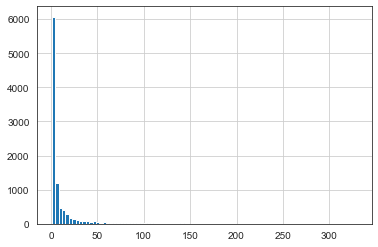

In [16]:
movierate["no_of_ratings"].hist(bins = 90)


<AxesSubplot:>

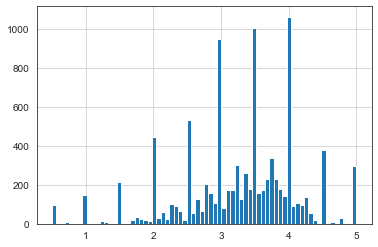

In [17]:
movierate["rating"].hist(bins = 70)

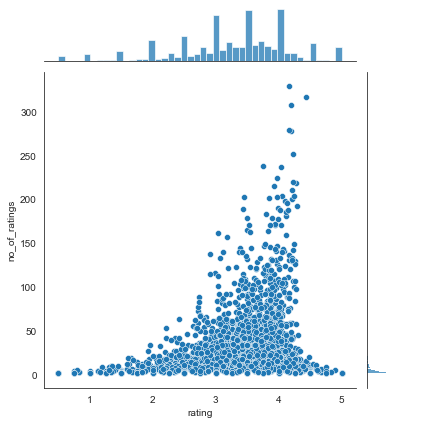

In [18]:
sns.jointplot(x = "rating",y = "no_of_ratings",data = movierate)

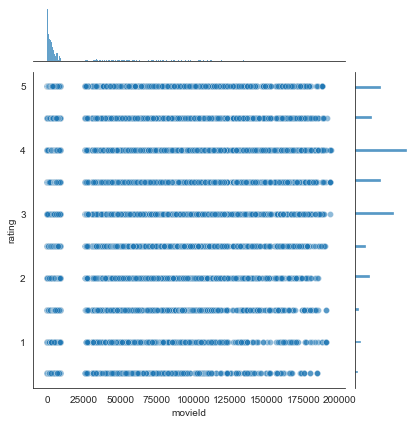

In [20]:
sns.jointplot(x = 'movieId',y = "rating", data = df,alpha = 0.5)

In [22]:
matmovie = df.pivot_table(index = "userId",columns = "title",values = 'rating')

In [23]:
matmovie.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
movierate.sort_values("no_of_ratings",ascending = False).head(10)

,rating,no_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [27]:
forrest_ratings = matmovie["Forrest Gump (1994)"]
jurassic_ratings = matmovie["Jurassic Park (1993)"]

In [28]:
forrest_ratings.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

In [30]:
similarto_forrestgump = matmovie.corrwith(forrest_ratings)

C:\Users\DELL\anaconda\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\DELL\anaconda\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
similarto_jurassic = matmovie.corrwith(jurassic_ratings)

C:\Users\DELL\anaconda\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\DELL\anaconda\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [33]:
corr_forrest = pd.DataFrame(similarto_forrestgump, columns= ["correlation"])
corr_forrest.dropna(inplace = True)

In [34]:
corr_forrest.head(7)

,correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.752057
10 Items or Less (2006),-1.000000


In [35]:
corr_jurassic = pd.DataFrame(similarto_jurassic,columns=["correlation"])
corr_jurassic.dropna(inplace = True)

In [36]:
corr_jurassic.head(7)

,correlation
title,
"'burbs, The (1989)",0.104077
(500) Days of Summer (2009),-0.125237
*batteries not included (1987),0.290929
...And Justice for All (1979),-0.981981
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.700649
10 Things I Hate About You (1999),-0.127968


In [54]:
corr_forrest["no_of_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [59]:
corr_forrest["no_of_ratings"]

title
'burbs, The (1989)                17
(500) Days of Summer (2009)       42
*batteries not included (1987)     7
...And Justice for All (1979)      3
10 Cent Pistol (2015)              2
                                  ..
[REC]² (2009)                      3
eXistenZ (1999)                   22
xXx (2002)                        24
xXx: State of the Union (2005)     5
¡Three Amigos! (1986)             26
Name: no_of_ratings, Length: 5460, dtype: int64

In [62]:
corr_forrest[corr_forrest["no_of_ratings"]>25].sort_values('correlation',ascending = False).head(10)

,correlation,no_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Bio-Dome (1996),0.723238,31
Fatal Attraction (1987),0.701856,36
X-Men: Days of Future Past (2014),0.682284,30
National Lampoon's Vacation (1983),0.677043,26
Easy A (2010),0.670081,27
Patch Adams (1998),0.652302,27
Mr. Holland's Opus (1995),0.652144,80
"Waterboy, The (1998)",0.632631,28


In [68]:
corr_jurassic["no_of_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [69]:
corr_jurassic.head()

,correlation,no_of_ratings
title,,
"'burbs, The (1989)",0.104077,17
(500) Days of Summer (2009),-0.125237,42
*batteries not included (1987),0.290929,7
...And Justice for All (1979),-0.981981,3
10 Cent Pistol (2015),-1.000000,2


In [72]:
corr_jurassic[corr_jurassic["no_of_ratings"]>25].sort_values("correlation",ascending = False).head(20)

,correlation,no_of_ratings
title,,
Jurassic Park (1993),1.000000,238
Rise of the Planet of the Apes (2011),0.920379,27
Zootopia (2016),0.882712,32
Mulan (1998),0.768935,45
Gravity (2013),0.753847,32
Coraline (2009),0.740472,35
Sgt. Bilko (1996),0.740272,33
True Grit (2010),0.727211,28
"Jerk, The (1979)",0.722308,27
